### Notebook to visualize CUMULO dataset

Target file; `A2008.336.0000.nc`

In [1]:
import os
import gc
import glob
import numpy as np
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [45]:
from scipy.stats import mode

In [2]:
datadir = '/home/tkurihana/scratch-midway2/data/clouds/CUMULO'

In [15]:
#filename = os.path.join(datadir, 'A2008.336.0000.nc') 
#filename = os.path.join(datadir, 'A2008.001.1855.nc') # A2008.001.0035.nc
filename = os.path.join(datadir, 'A2008.001.0035.nc')

In [16]:
f = Dataset(filename)

In [17]:
print(f.variables.keys()) # get all variable names

odict_keys(['time', 'longitude', 'latitude', 'ev_1km_emissive_29', 'ev_1km_emissive_33', 'ev_1km_emissive_34', 'ev_1km_emissive_35', 'ev_1km_emissive_36', 'ev_1km_emissive_27', 'ev_1km_emissive_20', 'ev_1km_emissive_21', 'ev_1km_emissive_22', 'ev_1km_emissive_23', 'ev_250_aggr1km_refsb_1', 'ev_250_aggr1km_refsb_2', 'ev_1km_refsb_26', 'cloud_water_path', 'cloud_optical_thickness', 'cloud_effective_radius', 'cloud_phase_optical_properties', 'cloud_top_pressure', 'cloud_top_height', 'cloud_top_temperature', 'cloud_emissivity', 'surface_temperature', 'cloud_mask', 'cloud_layer_type', 'cloud_layer_base', 'cloud_layer_top', 'cloud_type_quality', 'precipitation_flag'])


In [18]:
def importNetcdf(path=None, var_name=None):
    nc_fid=Dataset(path, 'r')
    field = nc_fid.variables[var_name][:]
    return field

In [19]:
cloud_types = importNetcdf(filename,  'cloud_layer_type')

In [20]:
cloud_types.shape

(1, 1354, 2030, 10)

(array([ 112.,    0.,  715.,    0.,   59.,    0., 1303.,    0.,   19.,
         342.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

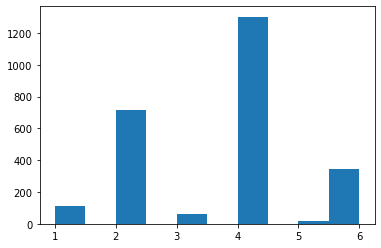

In [21]:
plt.hist(np.ravel(cloud_types))

In [22]:
np.max(cloud_types), np.min(cloud_types)

(6, 1)

In [23]:
# first function
cloud_array = -1*np.zeros(cloud_types.shape)
for i in range(8):
    idx = np.where(cloud_types == i)
    cloud_array[idx] = i
cloud_array = np.squeeze(cloud_array, axis=0)

In [49]:
# second function
prep = mode(cloud_types,axis=3)

AttributeError: 'ModeResult' object has no attribute 'shape'

In [53]:
prep[0].shape,prep[1].shape

((1, 1354, 2030, 1), (1, 1354, 2030, 1))

(array([      0.,       0.,       0.,       0.,       0., 2748620.,
              0.,       0.,       0.,       0.]),
 array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5]),
 <a list of 10 Patch objects>)

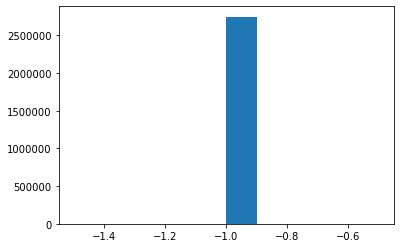

In [59]:
plt.hist(aa.ravel())

(array([3.80000e+01, 0.00000e+00, 0.00000e+00, 6.74000e+02, 0.00000e+00,
        0.00000e+00, 1.08800e+03, 0.00000e+00, 0.00000e+00, 2.74682e+06]),
 array([ 7. ,  7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <a list of 10 Patch objects>)

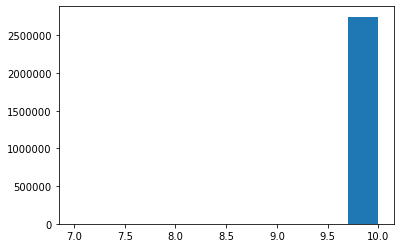

In [60]:
plt.hist(bb.ravel())

In [54]:
aa = prep[0]
bb = prep[1]

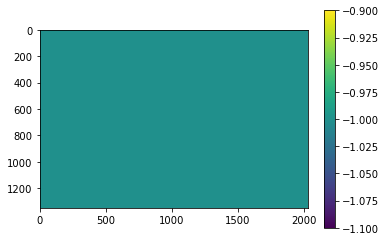

In [57]:
plt.figure()
plt.imshow(aa[0,:,:,1])
plt.colorbar()
plt.show()

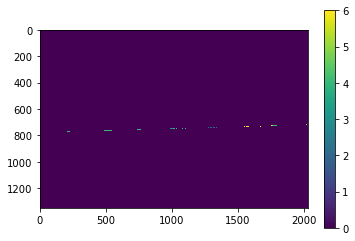

In [25]:
plt.figure()
plt.imshow(cloud_array)
plt.colorbar()
plt.show()

In [42]:
b = importNetcdf(filename,  'cloud_mask')

In [43]:
b.shape

(1, 1354, 2030)

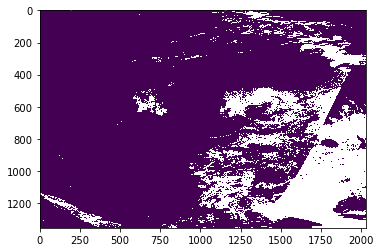

In [44]:
plt.imshow(b[0])

In [62]:
cloud_types.shape

(1, 1354, 2030, 10)

In [65]:
cmask = importNetcdf(filename,  'cloud_mask')

In [70]:
cmask = cmask.astype(np.float64)
nan_idx = np.where(cmask == 0)
cmask[nan_idx] = np.nan
cmask = np.squeeze(cmask)

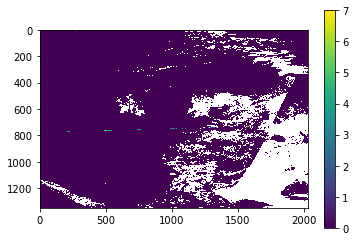

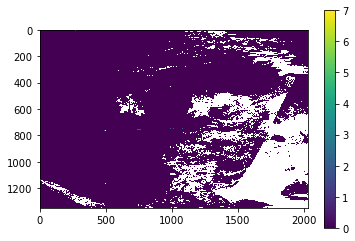

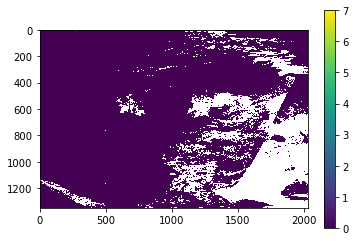

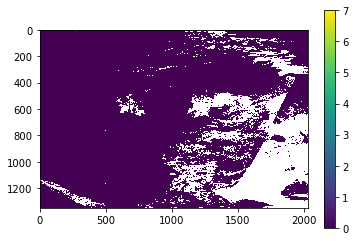

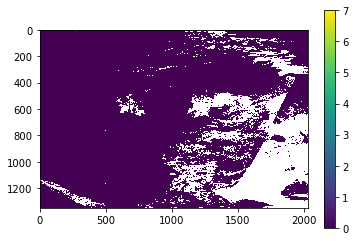

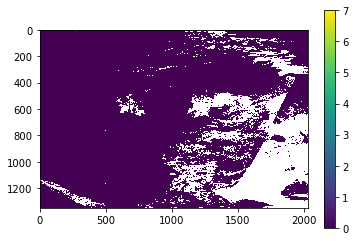

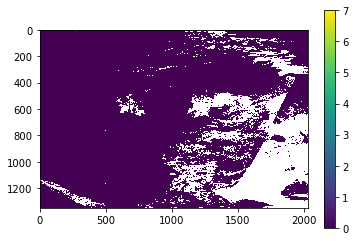

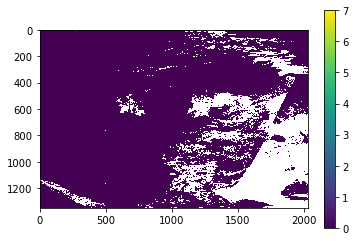

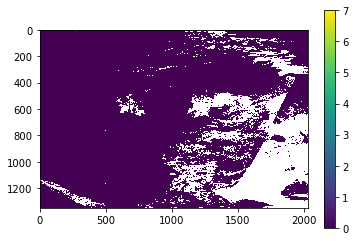

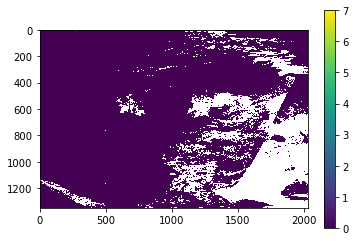

In [72]:
for i in range(10):
    fig = plt.figure()
    plt.imshow(cloud_types[0,:,:,i].data*cmask, vmin=0, vmax=7)
    plt.colorbar()
    plt.show()

#### Try on other variables

In [39]:
lons = importNetcdf(filename, 'longitude')
lats = importNetcdf(filename, 'latitude')
var = importNetcdf(filename, 'ev_1km_emissive_34')

In [40]:
var.data.shape

(1, 1354, 2030)

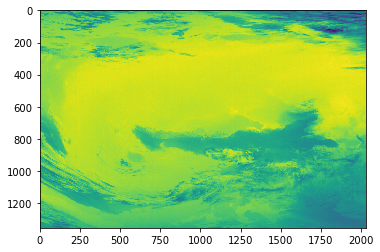

In [41]:
plt.imshow(var.data[0])